## Final Project Submission

Please fill out: 
* Student name: Esther Francis
* Student pace: Full time
* Scheduled project review date/time: 22/03/2024
* Instructor name: Nikita Njoroge
* Blog post URL: https://github.com/EstherMoringa/dsc-phase-1-project-v2-4


In [252]:
# Your code here - remember to use markdown cells for comments as well!
 

Import all libraries

In [253]:
import pandas as pd
import sqlite3 
import numpy as np
import seaborn as sns


For graphs. And have them be shown in our code and not separately.

In [254]:
import matplotlib.pyplot as plt

%matplotlib inline

1. IMDB 
This is a databade and our table of interest will be, movie_ratings and movie_basics .
Do the connection and read the data from both tables for analylization.
    1.1 imdb- movie_rating (df)

In [255]:
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

conn = sqlite3.connect('zippedData/im.db')
cursor = conn.cursor()
sql_q = """ SELECT * FROM movie_ratings"""
df = pd.read_sql(sql_q, conn)
print(df)


         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


print the information of the Movie_ratings  table to analize and see if there are any null values.

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


We can see there are no null values, we proceed to analyzing about popularity.

In [257]:
df_numvotes = pd.read_sql("""
SELECT *
FROM movie_ratings
ORDER BY numvotes DESC;
""", conn)
print(df_numvotes, conn)


        movie_id  averagerating  numvotes
0      tt1375666            8.8   1841066
1      tt1345836            8.4   1387769
2      tt0816692            8.6   1299334
3      tt1853728            8.4   1211405
4      tt0848228            8.1   1183655
...          ...            ...       ...
73851  tt8420530            6.8         5
73852  tt8747790            4.6         5
73853  tt9367004            8.2         5
73854  tt9647642            2.0         5
73855  tt9886934            7.0         5

[73856 rows x 3 columns] <sqlite3.Connection object at 0x000001F78CE26020>


Find the mean and Median to help understand the data more.

In [258]:
mean_numvotes = np.mean(df['numvotes'])
median_numvotes = np.median(df['numvotes'])
print(mean_numvotes)
print(median_numvotes)

                           

3523.6621669194105
49.0


In [259]:
df_numvotes = pd.read_sql("""
SELECT *
FROM movie_ratings

WHERE numvotes >= 50000 AND averagerating >= 5
""", conn)
print(df_numvotes, conn)

       movie_id  averagerating  numvotes
0     tt1210166            7.6    326657
1     tt1212419            6.5     87288
2     tt1229238            7.4    428142
3     tt1232829            7.2    477771
4     tt1243974            5.4     54646
...         ...            ...       ...
1034  tt2333784            6.1    156432
1035  tt2386490            7.6     60769
1036  tt2592614            5.6     74979
1037  tt2704998            7.0    163279
1038  tt3748172            6.6     65722

[1039 rows x 3 columns] <sqlite3.Connection object at 0x000001F78CE26020>


    1.2. Reading Data from the Movie_basics table. (Basics)

In [335]:
conn = sqlite3.connect('zippedData/im.db')
cursor = conn.cursor()
sql_basics = """ SELECT * FROM movie_basics"""
basics = pd.read_sql(sql_basics, conn)
basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Checking the summary information of the movie_basics table

In [334]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   averagerating1  73856 non-null  float64
 1   numvotes1       73856 non-null  int64  
 2   averagerating2  73856 non-null  float64
 3   numvotes2       73856 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 4.8+ MB


Do an inner join to get movies_id that are both in movie_rating table and movie_basics.

In [336]:
sql_query = """
SELECT basics.movie_id, basics.runtime_minutes, df.averagerating, df.numvotes, basics.genres
    FROM movie_basics AS basics
    INNER JOIN movie_ratings AS df ON basics.movie_id = df.movie_id;
"""

# Execute the SQL query and read the result into a pandas DataFrame
merged_table_df = pd.read_sql_query(sql_query, conn)

conn.close()


print(merged_table_df)

        movie_id  runtime_minutes  averagerating  numvotes  \
0      tt0063540            175.0            7.0        77   
1      tt0066787            114.0            7.2        43   
2      tt0069049            122.0            6.9      4517   
3      tt0069204              NaN            6.1        13   
4      tt0100275             80.0            6.5       119   
...          ...              ...            ...       ...   
73851  tt9913084             75.0            6.2         6   
73852  tt9914286             98.0            8.7       136   
73853  tt9914642              NaN            8.5         8   
73854  tt9914942              NaN            6.6         5   
73855  tt9916160             72.0            6.5        11   

                     genres  
0        Action,Crime,Drama  
1           Biography,Drama  
2                     Drama  
3              Comedy,Drama  
4      Comedy,Drama,Fantasy  
...                     ...  
73851           Documentary  
73852          

We get that the results have 73856 rows which is equivalent to the rows in the movie_rating tabl, hence it shows that every rating has a movie associated with the movie_basics table (which means there is a left JOIN) but not vice versa.

We get the summary of Merged_table data

In [263]:
merged_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   runtime_minutes  66236 non-null  float64
 2   averagerating    73856 non-null  float64
 3   numvotes         73856 non-null  int64  
 4   genres           73052 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.8+ MB


In [264]:
#From the output above we see there are null values in the 'runtime_minutes' and 'genres' columns
#Drop rows with null values in the 'runtime_minutes' column
merged_table_df = merged_table_df.dropna(subset=['runtime_minutes'])
merged_table_df

,movie_id,runtime_minutes,averagerating,numvotes,genres
0,tt0063540,175.0,7.0,77,"Action,Crime,Drama"
1,tt0066787,114.0,7.2,43,"Biography,Drama"
2,tt0069049,122.0,6.9,4517,Drama
4,tt0100275,80.0,6.5,119,"Comedy,Drama,Fantasy"
6,tt0137204,83.0,8.1,263,"Adventure,Animation,Comedy"
...,...,...,...,...,...
73849,tt9911774,130.0,8.4,365,Drama
73850,tt9913056,86.0,6.2,5,Documentary
73851,tt9913084,75.0,6.2,6,Documentary
73852,tt9914286,98.0,8.7,136,"Drama,Family"


In [265]:
#Drop rows with null values in the 'runtime_minutes' and 'genres' columns
merged_table_df = merged_table_df.dropna(subset=['runtime_minutes', 'genres'])
merged_table_df

,movie_id,runtime_minutes,averagerating,numvotes,genres
0,tt0063540,175.0,7.0,77,"Action,Crime,Drama"
1,tt0066787,114.0,7.2,43,"Biography,Drama"
2,tt0069049,122.0,6.9,4517,Drama
4,tt0100275,80.0,6.5,119,"Comedy,Drama,Fantasy"
6,tt0137204,83.0,8.1,263,"Adventure,Animation,Comedy"
...,...,...,...,...,...
73849,tt9911774,130.0,8.4,365,Drama
73850,tt9913056,86.0,6.2,5,Documentary
73851,tt9913084,75.0,6.2,6,Documentary
73852,tt9914286,98.0,8.7,136,"Drama,Family"


In [266]:
#We Check for any duplicates and drop them 
merged_table_df.duplicated().sum() #There are no duplicates

0

In [267]:
# Group by 'genres' and calculate mean rating for each genre and sort them in ascending order
genre_ratings = merged_table_df.groupby('genres')['averagerating'].mean()

sorted_genres = genre_ratings.sort_values(ascending=False)

top_genres = sorted_genres.head()

print("Genres with the highest average rating:")
top_genres

Genres with the highest average rating:


genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
Game-Show                     9.0
Drama,Short                   8.8
Documentary,News,Sport        8.8
Name: averagerating, dtype: float64

In [268]:
sorted_numvotes = merged_table_df.sort_values(by='numvotes', ascending=False)

sorted_numvotes.head(14000) #top 20 movies by number of votes

,movie_id,runtime_minutes,averagerating,numvotes,genres
2387,tt1375666,148.0,8.8,1841066,"Action,Adventure,Sci-Fi"
2241,tt1345836,164.0,8.4,1387769,"Action,Thriller"
280,tt0816692,169.0,8.6,1299334,"Adventure,Drama,Sci-Fi"
12072,tt1853728,165.0,8.4,1211405,"Drama,Western"
325,tt0848228,143.0,8.1,1183655,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
43161,tt4128382,73.0,4.5,488,Horror
72180,tt8951058,96.0,7.2,488,Documentary
72871,tt9226154,102.0,1.1,488,Romance
51157,tt5094192,155.0,6.8,487,"Action,Biography,History"


In [269]:
top_numgenres = sorted_numvotes.head(100).copy()

top_numgenres

,movie_id,runtime_minutes,averagerating,numvotes,genres
2387,tt1375666,148.0,8.8,1841066,"Action,Adventure,Sci-Fi"
2241,tt1345836,164.0,8.4,1387769,"Action,Thriller"
280,tt0816692,169.0,8.6,1299334,"Adventure,Drama,Sci-Fi"
12072,tt1853728,165.0,8.4,1211405,"Drama,Western"
325,tt0848228,143.0,8.1,1183655,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
151,tt0470752,108.0,7.7,424542,"Drama,Mystery,Sci-Fi"
6642,tt1659337,103.0,8.0,422671,Drama
10583,tt1800241,138.0,7.2,418221,"Crime,Drama"
29668,tt2872718,117.0,7.9,404476,"Crime,Drama,Thriller"


In [270]:
top_numgenres = pd.concat([top_numgenres, top_numgenres['genres'].str.split(',', expand=True)], axis=1)
#split 'genres' into separate columns for each comma-separated genre listed
top_numgenres

,movie_id,runtime_minutes,averagerating,numvotes,genres,0,1,2
2387,tt1375666,148.0,8.8,1841066,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
2241,tt1345836,164.0,8.4,1387769,"Action,Thriller",Action,Thriller,None
280,tt0816692,169.0,8.6,1299334,"Adventure,Drama,Sci-Fi",Adventure,Drama,Sci-Fi
12072,tt1853728,165.0,8.4,1211405,"Drama,Western",Drama,Western,None
325,tt0848228,143.0,8.1,1183655,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...
151,tt0470752,108.0,7.7,424542,"Drama,Mystery,Sci-Fi",Drama,Mystery,Sci-Fi
6642,tt1659337,103.0,8.0,422671,Drama,Drama,None,None
10583,tt1800241,138.0,7.2,418221,"Crime,Drama",Crime,Drama,None
29668,tt2872718,117.0,7.9,404476,"Crime,Drama,Thriller",Crime,Drama,Thriller


In [271]:
#drop 'genres' column

top_numgenres.drop('genres',axis=1, inplace=True)

top_numgenres

,movie_id,runtime_minutes,averagerating,numvotes,0,1,2
2387,tt1375666,148.0,8.8,1841066,Action,Adventure,Sci-Fi
2241,tt1345836,164.0,8.4,1387769,Action,Thriller,None
280,tt0816692,169.0,8.6,1299334,Adventure,Drama,Sci-Fi
12072,tt1853728,165.0,8.4,1211405,Drama,Western,None
325,tt0848228,143.0,8.1,1183655,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...
151,tt0470752,108.0,7.7,424542,Drama,Mystery,Sci-Fi
6642,tt1659337,103.0,8.0,422671,Drama,None,None
10583,tt1800241,138.0,7.2,418221,Crime,Drama,None
29668,tt2872718,117.0,7.9,404476,Crime,Drama,Thriller


In [272]:
top_numgenres.rename(columns = {0:'genre 1', 1:'genre 2', 2:'genre 3'}, inplace=True)

top_numgenres

,movie_id,runtime_minutes,averagerating,numvotes,genre 1,genre 2,genre 3
2387,tt1375666,148.0,8.8,1841066,Action,Adventure,Sci-Fi
2241,tt1345836,164.0,8.4,1387769,Action,Thriller,None
280,tt0816692,169.0,8.6,1299334,Adventure,Drama,Sci-Fi
12072,tt1853728,165.0,8.4,1211405,Drama,Western,None
325,tt0848228,143.0,8.1,1183655,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...
151,tt0470752,108.0,7.7,424542,Drama,Mystery,Sci-Fi
6642,tt1659337,103.0,8.0,422671,Drama,None,None
10583,tt1800241,138.0,7.2,418221,Crime,Drama,None
29668,tt2872718,117.0,7.9,404476,Crime,Drama,Thriller


In [273]:
genre_list = ['genre 1', 'genre 2', 'genre 3']
top_numgenres_count = {}

for var in genre_list:
    for genre in top_numgenres[var]:
        if genre != None:
            top_numgenres_count[genre] = top_numgenres_count.get(genre, 0) + 1


In [274]:
df_top_genres = pd.DataFrame({'top genres': [var for var in top_numgenres_count.keys()],
                              'values': [var for var in top_numgenres_count.values()]})

df_top_genres = df_top_genres.sort_values(by='values', ascending=False)

df_top_genres

,top genres,values
1,Adventure,57
0,Action,54
2,Drama,36
11,Sci-Fi,36
5,Comedy,20
13,Fantasy,16
8,Thriller,13
4,Mystery,11
6,Crime,11
3,Biography,8


We plot a graph for the most common genre of the top 100 movies.

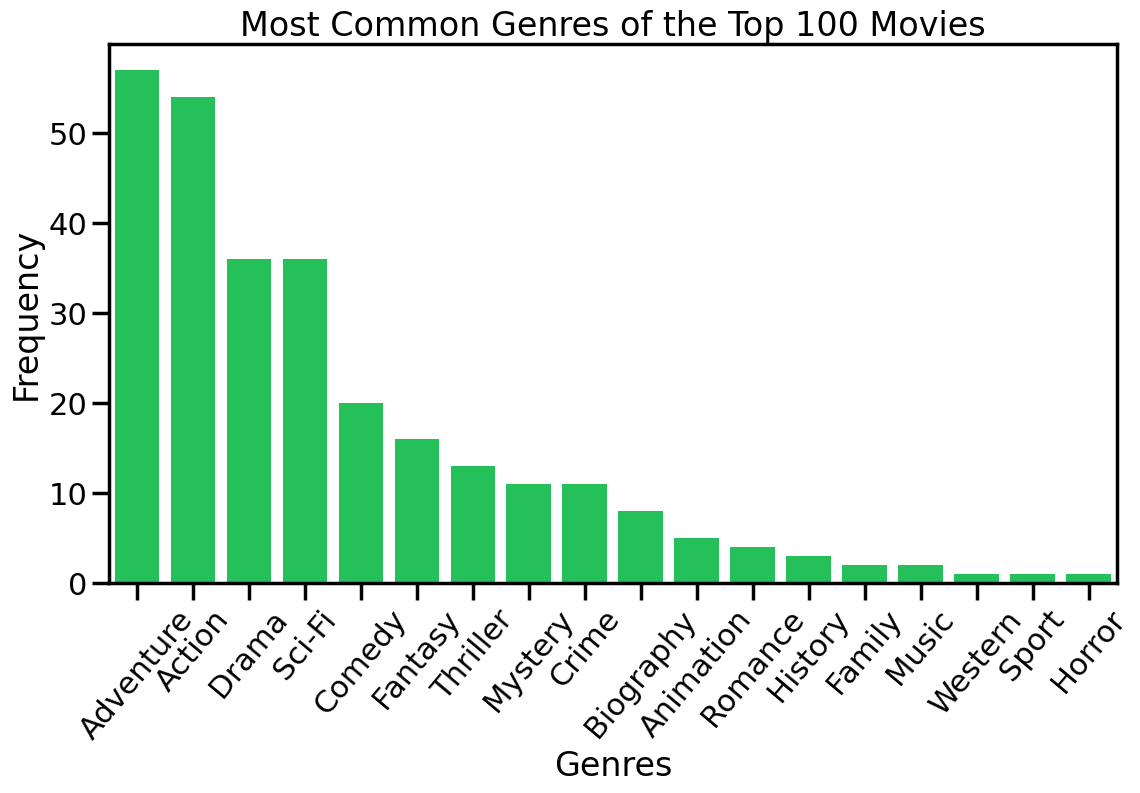

In [275]:
fig, ax = plt.subplots(figsize=(13,7))

ax = sns.barplot(x='top genres', y='values', data= df_top_genres, linewidth=.5, color='#0BDA51')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50);
ax.set(xlabel=None)
ax.set_ylabel(ylabel=None)
ax.set(title='Most Common Genres of the Top 100 Movies', xlabel='Genres', ylabel='Frequency')
sns.set_style(None)
sns.set_context('poster', font_scale=.8)

We can conclude that Adventure, Drama, Science fiction, comedy, Fantasy, Thriller, Mystry and Action are the best performing movies.

2. Box Office Mojo (bom)
Read the data and print it out for analysis.

In [276]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
                  
bom                  


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [277]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [278]:
bom.columns = ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'] #Edit the titles.
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Next,  filter the dataset for the best-selling movies by their domestic gross, then calculate the mean, median, and mode of their domestic gross. Additionally, visualize the distribution of the domestic gross for these movies.

In [279]:
# Convert 'foreign_gross' to numeric, errors='coerce' to handle non-numeric values
bom['foreign_gross'] = pd.to_numeric(bom['foreign_gross'], errors='coerce')

In [280]:
#Calculate total gross (domestic + foreign) 
bom['total_gross'] = bom['domestic_gross'] + bom['foreign_gross']

In [281]:
# Filter for the top 10% best-selling movies by total gross
top_10_percent = bom.nlargest(int(len(bom) * 0.1), 'total_gross')

In [282]:
# Calculate mean, median, and mode of domestic gross for these movies
mean_domestic_gross = top_10_percent['domestic_gross'].mean()
median_domestic_gross = top_10_percent['domestic_gross'].median()
mode_domestic_gross = top_10_percent['domestic_gross'].mode()[0]

print('Mean Domestic Gross: $' + str(mean_domestic_gross))
print('Median Domestic Gross: $' + str(median_domestic_gross))
print('Mode Domestic Gross: $' + str(mode_domestic_gross))

Mean Domestic Gross: $168640478.6775148
Median Domestic Gross: $145100000.0
Mode Domestic Gross: $130199999.0


Next, visualize the distribution of the domestic gross for the top-selling movies.

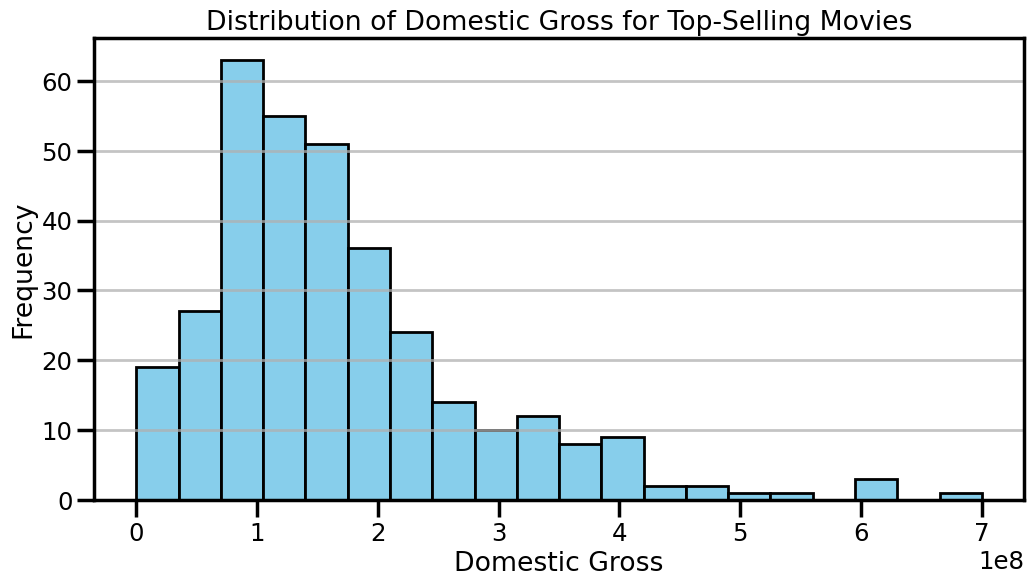

In [283]:
plt.figure(figsize=(12, 6))
plt.hist(top_10_percent['domestic_gross'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Domestic Gross for Top-Selling Movies')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [284]:
df_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [285]:
# We see that the unique movie names is less than the total number of rows we have 
df_budget['movie'].nunique()

5698

In [286]:
def to_int(x):
    x = int(x)
    return x

In [287]:
#Changing Data Types
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '')
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$', '', regex=False)
df_budget['production_budget'] = df_budget['production_budget'].apply(to_int)
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$', '', regex=False)
df_budget['domestic_gross'] = df_budget['domestic_gross'].apply(to_int)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$', '', regex=False)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].apply(to_int)


# create 'profit' column and get rid of uninmportant information for this visualisation
df_budget['profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']

In [288]:
df_budget.nlargest(10, ['worldwide_gross'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157


In [289]:
# statistical summary of all the columns.
df_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09


In [290]:
df_budget.nlargest(10, ['worldwide_gross'])


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157


In [291]:
df_budget.nlargest(10, ['domestic_gross'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
43,44,"Jun 15, 2018",Incredibles 2,200000000,608581744,1242520711,1042520711
74,75,"Jul 18, 2008",The Dark Knight,185000000,533720947,1001996207,816996207


In [292]:
df_budget.nlargest(10, ['production_budget'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923


In [293]:
print('Newest movie:', df_budget['release_date'].max())
print('Oldest movie:', df_budget['release_date'].min())
# Create anew column by changing the release_date to years
df_budget['year'] = pd.DatetimeIndex(df_budget['release_date']).year
last_15years = df_budget[(df_budget['year'] >= 2010)]
last_15years

Newest movie: Sep 9, 2016
Oldest movie: Apr 1, 1975


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000,2014
5771,72,"May 19, 2015",Family Motocross,10000,0,0,-10000,2015
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,2012
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,2018


In [294]:
top_worldwide_gross_in15years = last_15years.sort_values('worldwide_gross', ascending = False).iloc[:10]
top_worldwide_gross_in15years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018


In [295]:
height_top10_gross = sorted(last_15years.sort_values(by='worldwide_gross', ascending=False)[:10]['worldwide_gross'].tolist())
top10_gross = last_15years.sort_values(by='worldwide_gross', ascending=False)[:10]['movie'].values.tolist()
top10_gross.reverse()
# Correlation coefficient of Production Budget & Worldwide Gross
df_budget['production_budget'].corr(df_budget['worldwide_gross'], method='pearson')


0.7483059765694747

In [296]:
top_production_budget_in15years = last_15years.sort_values('production_budget', ascending = False).iloc[:10]
top_production_budget_in15years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,2017
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,2015
12,13,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-14997885,2013
13,14,"Mar 9, 2012",John Carter,275000000,73058679,282778100,7778100,2012


In [297]:
height_top10_budget = sorted(last_15years.sort_values(by='production_budget', ascending=False)[:10]['production_budget'].tolist())
top10_budget = last_15years.sort_values(by='production_budget', ascending=False)['movie'][:10].tolist()
top10_budget.reverse()
#Find
for i in range(len(height_top10_budget)):
    height_top10_budget[i] /= 1000000000
# order is in ascending
profit_b = sorted(last_15years.sort_values(by='profit', ascending=False)['profit'].tolist())
for i in range(len(profit_b)):
    profit_b[i] /= 100000000
#find the top profitable in the past 15 years.
top_profitable_movies_in10years = last_15years.sort_values('profit', ascending = False).iloc[:10]
top_profitable_movies_in10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018
155,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,2013
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706,2017


Afer getting the top profitable movies, we create a new column for the profit.

In [298]:
df_budget['profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017


In [299]:
last_15years = df_budget[(df_budget['year'] >= 2010)]
last_15years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
...,...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000,2014
5771,72,"May 19, 2015",Family Motocross,10000,0,0,-10000,2015
5772,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,-4416,2012
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,2018


In [300]:
top_profitable_movies_in15years = last_15years.sort_values('profit', ascending = False).iloc[:10]
top_profitable_movies_in15years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,2015
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,2012
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,2018
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,2018
155,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,1122469910,2013
134,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706,2017


(1.0, 1.7)

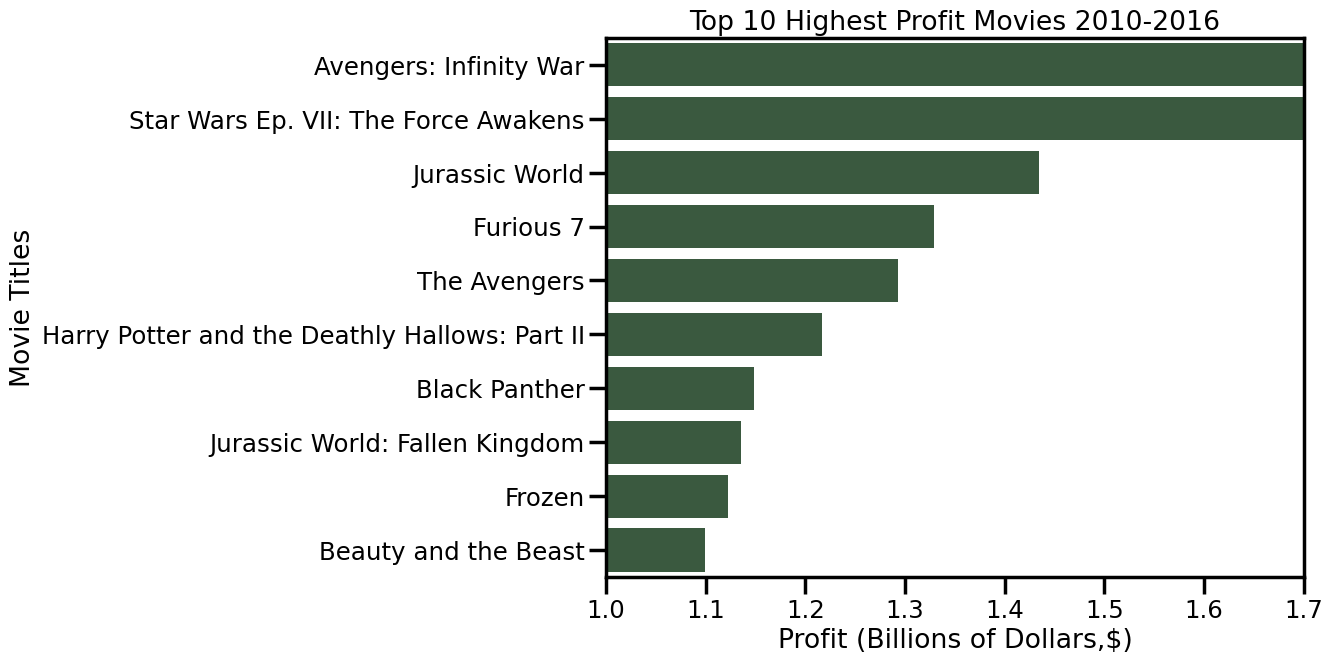

In [301]:
height_top10_profit = sorted(last_15years.sort_values(by='profit', ascending=False)[:10]['profit'].tolist())
top10_profit = last_15years.sort_values(by='profit', ascending=False)['movie'][:10].tolist()
height_top10_profit.reverse()

for i in range(len(height_top10_profit)):
    height_top10_profit[i] /= 1000000000
#Plotting the graph
fig, ax = plt.subplots(figsize=(9, 7))
ax.set_xlim(0.75, 1.8)
barplot = sns.barplot(x = height_top10_profit, y = top10_profit, color='#355E3B')
barplot.set(title = 'Top 10 Highest Profit Movies 2010-2016', xlabel = 'Profit (Billions of Dollars,$)', ylabel = 'Movie Titles')
ax.set_xlim(1, 1.7)

In [ ]:
CONCLUSIONS

Conclusions
By analyzing the Data using the cleaned data and the visulaizations, I can recommend;
Adapt in producing more adventure and Action movies as they got the best ratings.
Keep the runtime below 135 has it was attracting an audience. 
Given all the information we gathered and visualized, the recommendations we have are:
